Notebook to check utility

In [1]:
import sys
sys.path += ["../src"]
import utils
import config
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib.pyplot import subplots as sbp 
from importlib import reload
import jl_vae
import pickle
from tqdm import tqdm
import geopandas as gpd
import pyfixest as pf
from sklearn.metrics import r2_score

In [4]:
## ISP data
isp = pd.read_csv('/data/housing/data/intermediate/regression_syn_homes/R2_df_no_nans_newDataJacopo.csv',index_col=0)
isp.describe()

,df_real,df_nfvae,df_ablation,df_copula_nf,df_copula_ablation,df_shuffle_province_num,df_shuffle_cap_num
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,0.615247,0.391874,-0.067162,0.194248,0.431077,0.376718,0.602252
std,0.062912,0.136867,0.562916,0.994140,0.096539,0.137480,0.068735
min,0.473338,-0.118760,-3.100929,-9.755911,0.177745,-0.334095,0.415172
25%,0.578533,0.313289,-0.165463,0.240047,0.371600,0.289321,0.559957
50%,0.617060,0.416643,0.054608,0.328122,0.430521,0.384332,0.609496
75%,0.654315,0.482290,0.299584,0.405505,0.486812,0.466436,0.647694
max,0.777453,0.704380,0.605914,0.641102,0.679546,0.651063,0.776643


In [6]:
df_r2_plt = pd.DataFrame()
cols = list(isp.columns)
cols = cols[1:]
for col in cols:
    df_r2_plt[col] = np.abs(isp['df_real'] - isp[col])

df_r2_plt

,df_nfvae,df_ablation,df_copula_nf,df_copula_ablation,df_shuffle_province_num,df_shuffle_cap_num
AG,0.230339,0.527006,0.257445,0.189266,0.099360,0.018244
AL,0.230315,0.217016,0.217860,0.113213,0.100896,0.011841
AN,0.166828,0.647739,0.263587,0.207819,0.288637,0.006568
AO,0.252019,0.537188,0.614758,0.221969,0.243468,0.013093
AP,0.163678,0.980102,0.345542,0.168667,0.194934,0.007336
...,...,...,...,...,...,...
VE,0.434281,1.313417,0.311272,0.282640,0.280322,0.003690
VI,0.101269,0.256968,0.140506,0.064781,0.071123,0.007271
VR,0.200914,1.853595,0.923653,0.156508,0.317587,0.009081
VT,0.216290,0.235108,0.171496,0.124686,0.146430,0.007941


(0.0, 1.5)

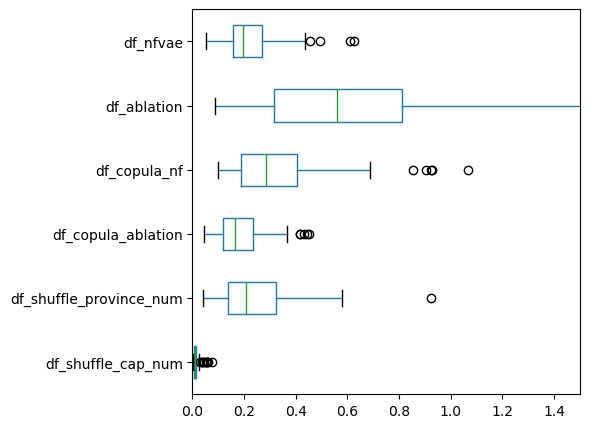

In [8]:
fig, ax = plt.subplots(figsize=(5,5))
ordine = ['df_shuffle_cap_num','df_shuffle_province_num','df_copula_ablation','df_copula_nf','df_ablation','df_nfvae']
df_r2_plt[ordine].boxplot(ax=ax, vert=False,grid=False)
ax.set_xlim([0,1.5])

## Airbnb

In [10]:
airbnb = pd.read_csv('/data/housing/data/intermediate/regression_syn_homes/airbnb_utility_22092025.csv',index_col=0)
airbnb.describe()

,df_real,df_nfvae,df_vae,df_nf_copula,df_copula,df_shuffle_city_num,df_shuffle_neighbourhood_num
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,0.581406,0.261649,0.185276,-7.400771,0.413028,0.504165,0.580995
std,0.089964,0.284677,0.344873,30.795662,0.201671,0.081892,0.089895
min,0.348734,-0.370702,-0.839000,-122.883122,-0.202353,0.295924,0.348388
25%,0.537856,0.139946,0.090501,0.193795,0.412272,0.471250,0.537592
50%,0.571435,0.368288,0.269966,0.343249,0.464243,0.500058,0.570380
75%,0.658386,0.461446,0.384092,0.376063,0.514336,0.551023,0.657856
max,0.701441,0.557402,0.605983,0.522458,0.622550,0.622303,0.701337


In [11]:
df_r2_plt2 = pd.DataFrame()
cols = list(airbnb.columns)
cols = cols[1:]
for col in cols:
    df_r2_plt2[col] = np.abs(airbnb['df_real'] - airbnb[col])

df_r2_plt2

,df_nfvae,df_vae,df_nf_copula,df_copula,df_shuffle_city_num,df_shuffle_neighbourhood_num
austin,0.180802,0.510160,0.301885,0.139355,0.054459,0.000276
barcelona,0.176738,0.322196,0.107736,0.101301,0.031671,0.000275
brisbane,0.157324,0.299021,0.148623,0.143193,0.073140,0.001292
cape town,0.132399,0.201883,0.514036,0.068420,0.087955,0.000258
copenhagen,0.726564,0.151948,0.667546,0.729382,0.079011,0.000134
hawaii,0.172130,0.585828,0.200378,0.206474,0.108593,0.000080
hong-kong,0.411959,0.146721,0.330883,0.087014,0.032343,0.000799
lyon,0.686256,0.283841,0.154285,0.113650,0.049194,0.000232
mexico city,0.089581,0.414289,0.363843,0.077791,0.045781,0.000087
montreal,0.969423,1.437721,0.242545,0.084540,0.063338,0.000326


In [14]:
df_r2_plt2.describe()

,df_nfvae,df_vae,df_nf_copula,df_copula,df_shuffle_city_num,df_shuffle_neighbourhood_num
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,0.319757,0.396130,7.982177,0.168378,0.077241,0.000411
std,0.263095,0.328359,30.827684,0.158909,0.041640,0.000392
min,0.089581,0.095458,0.094962,0.068420,0.031671,0.000080
25%,0.152065,0.210178,0.153566,0.086396,0.051906,0.000145
50%,0.178770,0.291431,0.242268,0.126096,0.070161,0.000276
75%,0.427535,0.438256,0.369853,0.168666,0.088078,0.000440
max,0.969423,1.437721,123.584563,0.729382,0.202602,0.001310


(-0.05, 1.5)

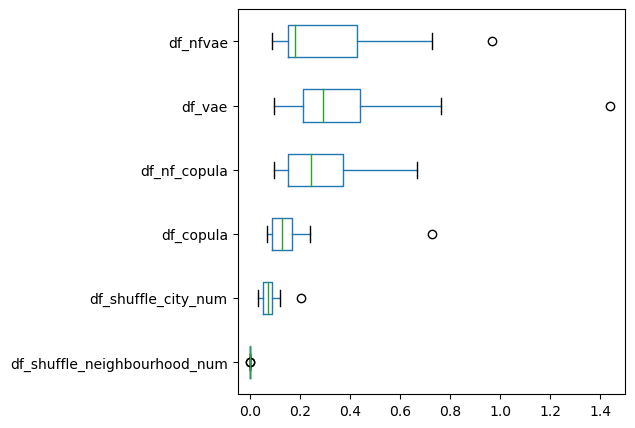

In [15]:
fig, ax = plt.subplots(figsize=(5,5))
ordine = ['df_shuffle_neighbourhood_num','df_shuffle_city_num','df_copula','df_nf_copula','df_vae','df_nfvae']
df_r2_plt2[ordine].boxplot(ax=ax, vert=False,grid=False)
ax.set_xlim([-0.05,1.5])

Rimuovo santiago

In [17]:
airbnb_no_santiago = airbnb.loc[airbnb.index != 'santiago',:]
airbnb_no_santiago.describe()

,df_real,df_nfvae,df_vae,df_nf_copula,df_copula,df_shuffle_city_num,df_shuffle_neighbourhood_num
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.573404,0.242908,0.157229,0.298052,0.399060,0.504520,0.572972
std,0.087028,0.284268,0.337562,0.155905,0.200578,0.084754,0.086919
min,0.348734,-0.370702,-0.839000,-0.140516,-0.202353,0.295924,0.348388
25%,0.534633,0.128324,0.048233,0.214983,0.410006,0.463506,0.534380
50%,0.563528,0.364340,0.244347,0.349147,0.462226,0.501277,0.562729
75%,0.629479,0.455699,0.373571,0.378223,0.495347,0.566662,0.629094
max,0.689801,0.557402,0.487917,0.522458,0.621381,0.622303,0.689543


(-0.05, 1.5)

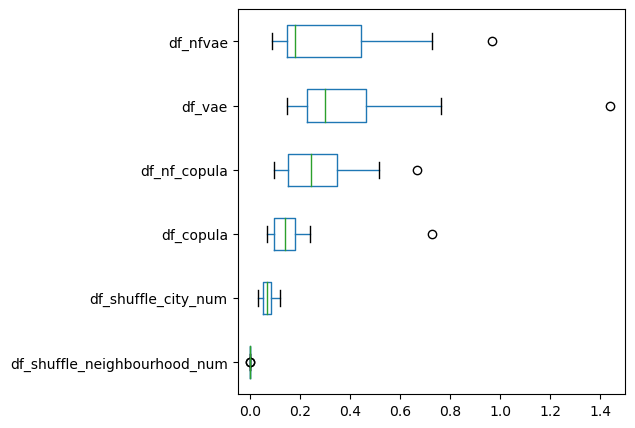

In [18]:
df_r2_plt3 = pd.DataFrame()
cols = list(airbnb_no_santiago.columns)
cols = cols[1:]
for col in cols:
    df_r2_plt3[col] = np.abs(airbnb_no_santiago['df_real'] - airbnb_no_santiago[col])

fig, ax = plt.subplots(figsize=(5,5))
ordine = ['df_shuffle_neighbourhood_num','df_shuffle_city_num','df_copula','df_nf_copula','df_vae','df_nfvae']
df_r2_plt3[ordine].boxplot(ax=ax, vert=False,grid=False)
ax.set_xlim([-0.05,1.5])

In [19]:
airbnb_no_santiago

,df_real,df_nfvae,df_vae,df_nf_copula,df_copula,df_shuffle_city_num,df_shuffle_neighbourhood_num
austin,0.654154,0.473352,0.143994,0.352269,0.514799,0.599696,0.653878
barcelona,0.541078,0.364340,0.218882,0.433342,0.439778,0.509407,0.540804
brisbane,0.671082,0.513758,0.372061,0.522458,0.527889,0.597942,0.669790
cape town,0.689801,0.557402,0.487917,0.175765,0.621381,0.601845,0.689543
copenhagen,0.527029,-0.199534,0.375081,-0.140516,-0.202353,0.448019,0.526896
hawaii,0.549525,0.377394,-0.036303,0.349147,0.343050,0.440931,0.549445
hong-kong,0.563528,0.151568,0.416807,0.232644,0.476513,0.531184,0.562729
lyon,0.528188,-0.158068,0.244347,0.373903,0.414538,0.478994,0.527956
mexico city,0.547058,0.457477,0.132769,0.183214,0.469266,0.501277,0.546971
montreal,0.598721,-0.370702,-0.839000,0.356176,0.514182,0.535383,0.598395


In [20]:
df_r2_plt3

,df_nfvae,df_vae,df_nf_copula,df_copula,df_shuffle_city_num,df_shuffle_neighbourhood_num
austin,0.180802,0.510160,0.301885,0.139355,0.054459,0.000276
barcelona,0.176738,0.322196,0.107736,0.101301,0.031671,0.000275
brisbane,0.157324,0.299021,0.148623,0.143193,0.073140,0.001292
cape town,0.132399,0.201883,0.514036,0.068420,0.087955,0.000258
copenhagen,0.726564,0.151948,0.667546,0.729382,0.079011,0.000134
hawaii,0.172130,0.585828,0.200378,0.206474,0.108593,0.000080
hong-kong,0.411959,0.146721,0.330883,0.087014,0.032343,0.000799
lyon,0.686256,0.283841,0.154285,0.113650,0.049194,0.000232
mexico city,0.089581,0.414289,0.363843,0.077791,0.045781,0.000087
montreal,0.969423,1.437721,0.242545,0.084540,0.063338,0.000326
